# Logistic Regression: Progetto Portfolio 

In questo progetto portfolio si creerà un modello che predice se un utente cliccherà o meno su un Advertisement a partire da un fake dataset. Essendo un problema di Classificazione Binaria si userà un modello di Regressione Logistica.

Il dataset contiene le seguenti feature:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Importare librerie

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Ottenere i dati

In [3]:
ad_data = pd.read_csv('advertising.csv')

In [4]:
ad_data.info() # no Missing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Si visualizza per prima cosa se il dataset sia ben bilanciato o meno.

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

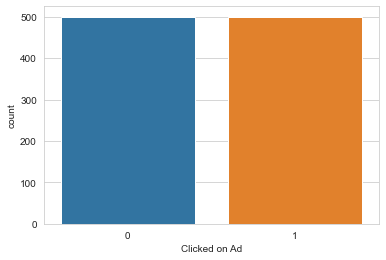

In [15]:
sns.countplot(data=ad_data,x='Clicked on Ad') # perfettamente bilanciato, è un fake dataset

Si visualizza la distribuzione delle età degli utenti.

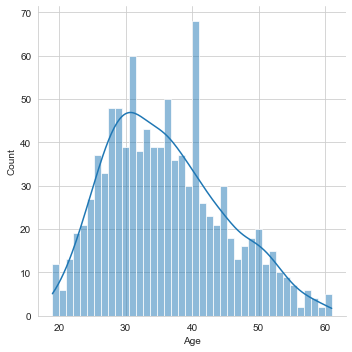

In [10]:
sns.displot(data=ad_data,x='Age',bins=40,kde=True)

Si verifica la relazione tra l'età e il tempo speso quotidianamente su internet.

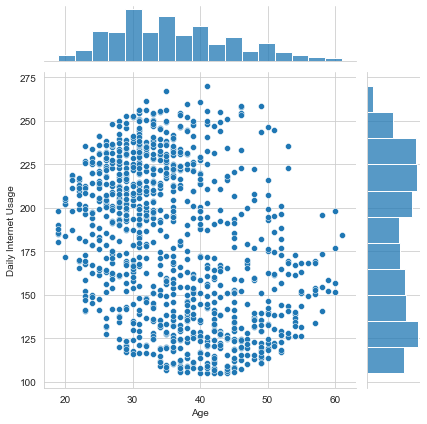

In [12]:
sns.jointplot(data=ad_data,x='Age',y='Daily Internet Usage')

**Come ci si poteva aspettare il tempo speso quotidianamente su internet decresce molto rapidamente con l'aumentare dell'età dell'utente.**

Sapendo questo andamento generale, non stupendoci, si va nel dettaglio e si analizza la relazione tra l'età degli utenti e il tempo giornaliero speso sul sito.

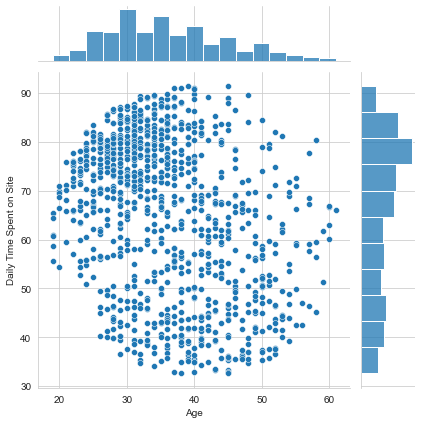

In [11]:
sns.jointplot(data=ad_data,x='Age',y='Daily Time Spent on Site')

**L'andamento visto con il tempo speso giornalmente su internet viene rispettato anche per il tempo speso giornalmente sul sito.** 

Si visualizza questa relazione con un plot kde.

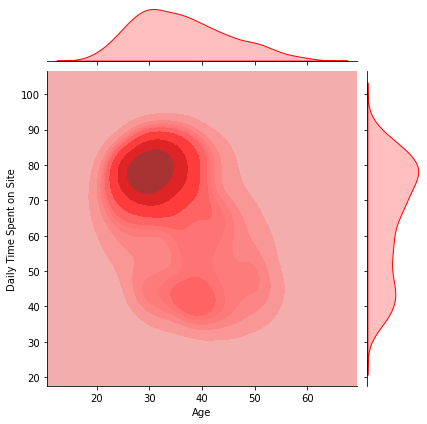

In [9]:
sns.jointplot(data=ad_data,kind='kde',x='Age',y='Daily Time Spent on Site',fill=True,thresh=0,color='red')

Si analizza, indipendentemente dall'età, la relazione fra il tempo speso sul sito e su internet degli utenti nel dataset.

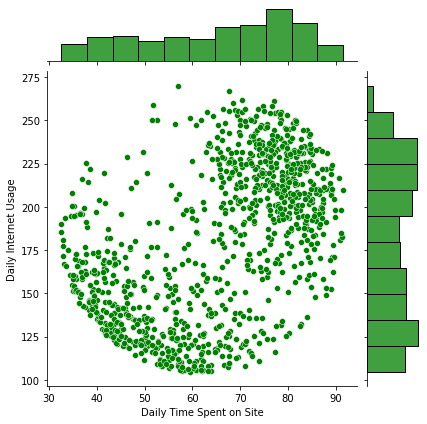

In [10]:
sns.jointplot(data=ad_data,y='Daily Internet Usage',x='Daily Time Spent on Site',color='green')

**Parrebbe una distribuzione bimodale.**

Infine si crea un pairplot, con hue dato dalla colonna target 'Clicked on Ad', per osservare tutte le relazioni fra le feature.

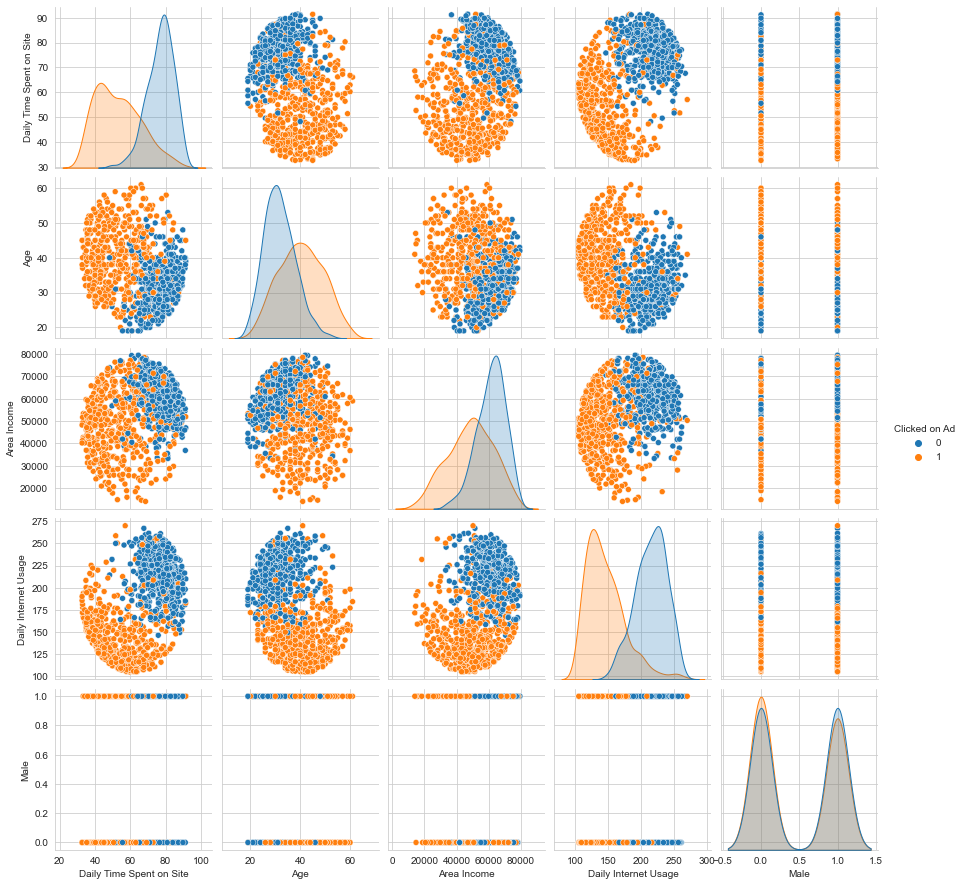

In [13]:
sns.pairplot(data=ad_data,hue='Clicked on Ad')

**La bimodalità intuita precedentemente sembrerebbe essere veritiera, un picco dato da chi clicca sull'Ad e un picco da chi non lo fa. Rifacciamo il plot precedente esplicitando la hue come nel pairplot.**

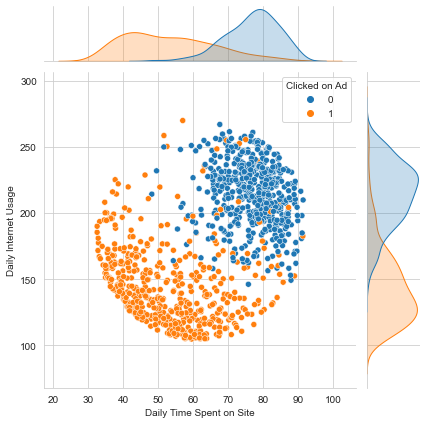

In [14]:
sns.jointplot(data=ad_data,y='Daily Internet Usage',
              x='Daily Time Spent on Site',hue='Clicked on Ad')

**Si potrebbe ipotizzare che chi trascorre poco tempo su internet, e di conseguenza sul sito, sia poco esperto dell'ambiente e ha più probabilità di cliccare su un Advertisement. Viceversa per chi spende molto tempo su internet e sito.**

# Training & Testing Data

Prima dello split vero e proprio, si verifica che tutte le feature siano in un formato che si può dare in pasto ad un modello di machine learning.

In [17]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Le colonne 'Ad Topic Line', 'City', 'Country' e 'Timestamp' non sono in un formato buono per un algoritmo di machine learning. Sebbene per il nostro progetto, basato su fake data, non ci sia bisogno di molto feature engineering, lo faremo per una di queste categorical feature.**

In [20]:
ad_data['Ad Topic Line'].nunique() # il dataset è composto da 1000 entries!

1000

In [18]:
ad_data['Country'].nunique()

237

In [19]:
ad_data['City'].nunique() 

969

Dato che manipolare la colonna 'Timestamp' è dispendioso a livello di tempo e che le colonne 'City' e 'Ad Topic Line' hanno troppi valori unici (quasi tutti diversi per ogni entry del dataset) si farà one-hot encoding della colonna 'Country'.

In [21]:
countries = pd.get_dummies(ad_data['Country'],drop_first=True)

In [23]:
ad_data = pd.concat([ad_data,countries],axis=1)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,...,0,0,0,0,0,0,0,0,0,0


Si scartano le feature che non ci servono più.

In [24]:
ad_data = ad_data.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1)
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Albania,Algeria,American Samoa,Andorra,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.30,45,67782.17,134.42,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,51.63,51,42415.72,120.37,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ora che il dataset è in un buon formato per essere dato in pasto all'algoritmo, si fa lo split del dataset in train e test data.

In [25]:
from sklearn.model_selection import train_test_split

In [35]:
X = ad_data.drop('Clicked on Ad',axis=1)
y = ad_data['Clicked on Ad']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model Training

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()

In [39]:
logmodel.fit(X_train,y_train)

LogisticRegression()

## Performance del Modello

Si fanno fare le previsioni al modello sul test dataset.

In [40]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

Ne valutiamo le performance con una confusion matrix e un classification report.

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(confusion_matrix(y_test,predictions))

[[149   8]
 [ 14 129]]


Text(0.5, 1.0, 'Confusion Matrix in percentuali')

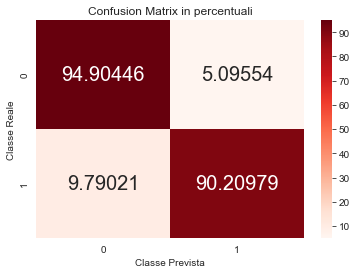

In [69]:
conf_mat = confusion_matrix(y_test,predictions)
conf_mat = 100*(conf_mat.astype('float')/conf_mat.sum(axis=1)[:,np.newaxis])

sns.heatmap(conf_mat,annot=True,cmap='Reds',fmt='.5f',annot_kws={'size':20})
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Reale')
plt.title('Confusion Matrix in percentuali')

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



**Il modello ha performato molto bene in generale.**

E qui si conclude il progetto portfolio su un problema di Regressione Logistica.